In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting statistical graphics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


pd.set_option('display.max_columns', None) # globally set printing options
pd.set_option('display.max_rows', None) # globally set printing options 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input/ee-769-assignment1/test.csv
/kaggle/input/ee-769-assignment1/sample_submission.csv
/kaggle/input/ee-769-assignment1/train.csv


In [2]:
# Read the training data into a new pandas dataframe
data = pd.read_csv('/kaggle/input/ee-769-assignment1/train.csv')

# Display the size of training data 
shape = data.shape
print("Number of datapoints/rows in the training dataset is: "+ str(shape[0]))
print("Number of features/columns in the training dataset is: "+ str(shape[1]))

Number of datapoints/rows in the training dataset is: 1028
Number of features/columns in the training dataset is: 34


In [3]:
# View the names of the features available in training data
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'],
      dtype='object')

In [4]:
# View the data types available in training data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
Age                         1028 non-null int64
Attrition                   1028 non-null int64
BusinessTravel              1028 non-null object
DailyRate                   1028 non-null int64
Department                  1028 non-null object
DistanceFromHome            1028 non-null int64
Education                   1028 non-null int64
EducationField              1028 non-null object
EmployeeCount               1028 non-null int64
EmployeeNumber              1028 non-null int64
EnvironmentSatisfaction     1028 non-null int64
Gender                      1028 non-null object
HourlyRate                  1028 non-null int64
JobInvolvement              1028 non-null int64
JobLevel                    1028 non-null int64
JobRole                     1028 non-null object
JobSatisfaction             1028 non-null int64
MaritalStatus               1028 non-null object
MonthlyIncome          

In [5]:
# View the first few datapoints of training data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [6]:
# Check whether there is any missing values in training data
print(data.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [7]:
# Inspect the range of values in each feature
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


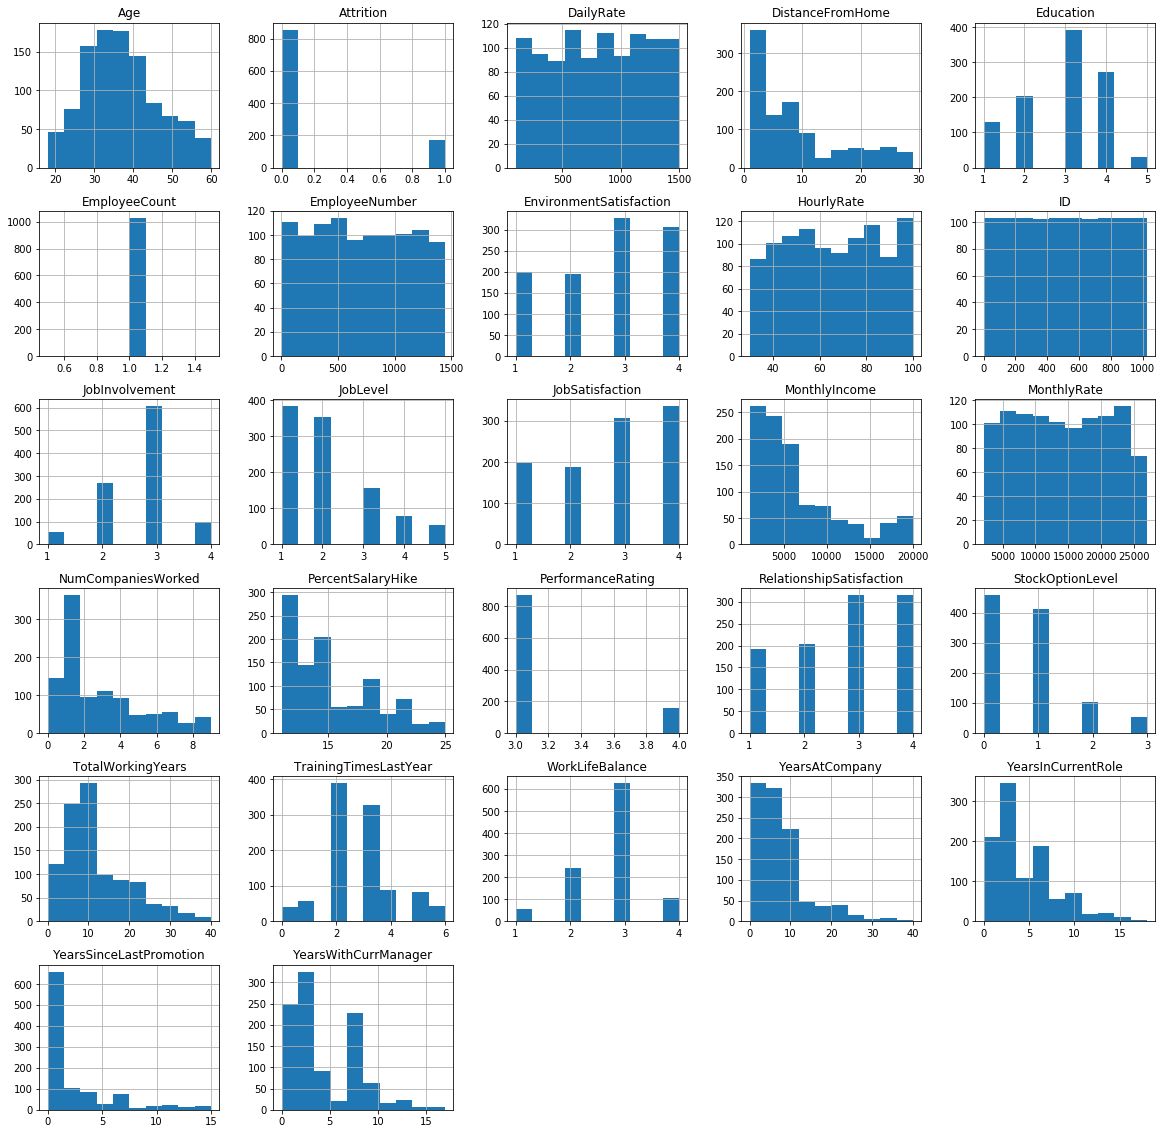

In [8]:
# Visualize the distribution of features across datapoints 
data.hist(figsize = (20,20))
plt.show()

In [9]:
# Find out the number of employees who left the company and those who didn’t
print("Number of employees who didn't leave the company: " + str(data.Attrition.value_counts()[0]))
print("Number of employees who left the company: " + str(data.Attrition.value_counts()[1]))

Number of employees who didn't leave the company: 856
Number of employees who left the company: 172


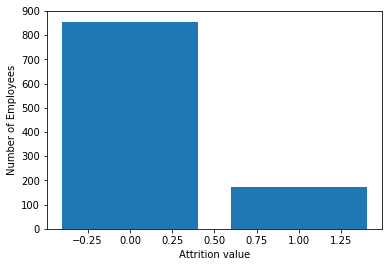

In [10]:
# Plot the two attrition values (0 and 1) 
attrition_count = data.groupby('Attrition').count()
plt.bar(attrition_count.index.values, attrition_count['JobSatisfaction'])
plt.xlabel('Attrition value')
plt.ylabel('Number of Employees')
plt.show()

In [11]:
# Find correlations of features with respect to Attrition
data_corr = data.copy()
data_corr['Target'] = data_corr['Attrition']
data_corr = data_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'ID'], axis=1)
correlations = data_corr.corr()['Target'].sort_values()
print('Features with positive correlations: \n', correlations.tail(6))
print("="*45)
print('Features with negative correlations: \n', correlations.head(5))

Features with positive correlations: 
 PerformanceRating     0.005300
PercentSalaryHike     0.008138
MonthlyRate           0.025739
NumCompaniesWorked    0.037174
DistanceFromHome      0.086875
Target                1.000000
Name: Target, dtype: float64
Features with negative correlations: 
 TotalWorkingYears   -0.178842
JobLevel            -0.169121
Age                 -0.168641
MonthlyIncome       -0.163709
StockOptionLevel    -0.160597
Name: Target, dtype: float64


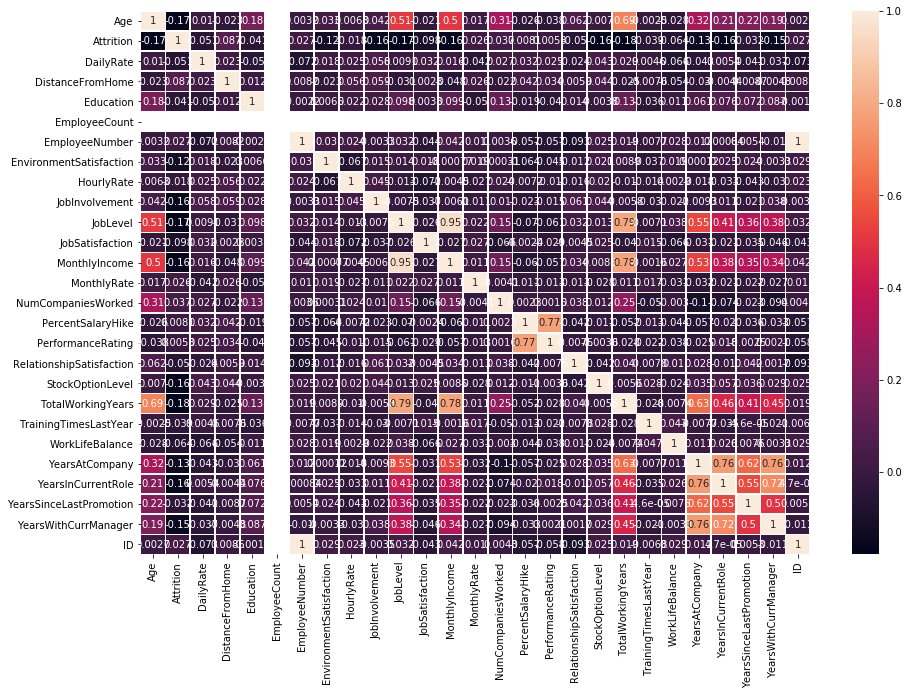

In [12]:
# Draw a heatmap to show the correlations of features
corr_matrix = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix, 
            annot = True, 
            linewidths = 0.5)
plt.show()

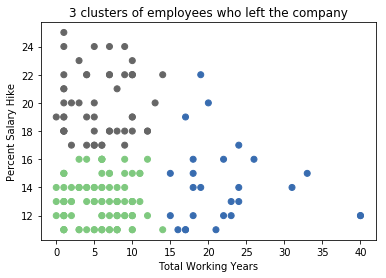

In [13]:
# Analyze the leavers by three clusters 
left_emp =  data[['TotalWorkingYears', 'PercentSalaryHike']][data.Attrition == 1]

# Create groups using K-means clustering
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['TotalWorkingYears'], left_emp['PercentSalaryHike'], 
            c = left_emp['label'],
            cmap = 'Accent')
plt.xlabel('Total Working Years')
plt.ylabel('Percent Salary Hike')
plt.title('3 clusters of employees who left the company')
plt.show()

In [14]:
# View the distribution of features across the two classes of Attrition
data.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.712617,815.773364,8.696262,2.892523,1.0,705.167056,2.778037,65.619159,2.781542,2.179907,2.806075,6988.733645,14162.245327,2.655374,15.158879,3.151869,2.757009,0.818925,12.059579,2.792056,2.783879,7.476636,4.523364,2.257009,4.385514,509.935748
1,33.447674,760.656977,10.575581,2.779070,1.0,735.238372,2.430233,64.616279,2.482558,1.662791,2.517442,4860.058140,14648.069767,2.906977,15.238372,3.156977,2.610465,0.459302,8.220930,2.656977,2.662791,5.226744,2.970930,1.976744,2.924419,531.238372


In [15]:
# Drop the redundant features from the training data 
data = data.drop(['EmployeeCount', 'EmployeeNumber', 'ID'], 
                 axis = 1)

In [16]:
# Encode the nominal categorical features
data = pd.get_dummies(data, drop_first = True)

In [17]:
# View the dimensions of encoded training data 
shape = data.shape
print("Number of datapoints/rows in the encoded training dataset is: "+ str(shape[0]))
print("Number of features/columns in the encoded training dataset is: "+ str(shape[1]))
data.head()

Number of datapoints/rows in the encoded training dataset is: 1028
Number of features/columns in the encoded training dataset is: 45


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [18]:
# Separate the label from the training data 
y = data['Attrition']

In [19]:
# Separate the features from the training data 
X = data.drop('Attrition', axis = 1)

In [20]:
# Deal with class imbalance and split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace = True,
                                n_samples = X_train[y_train == 0].shape[0],
                                random_state = 1)
X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace = True,
                                n_samples = X_train[y_train == 1].shape[0],
                                random_state = 1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

# View the shape of data in different sampling methods 
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (822, 44) (822,)
Upsampled shape: (1352, 44) (1352,)
Downsampled shape: (292, 44) (292,)


In [ ]:
# Build random forest classifier
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d)}

print("="*15 + " Random Forest Classifier " + "="*15)
for method in methods_data.keys():
    pip_rf = make_pipeline(StandardScaler(),
                           RandomForestClassifier(n_estimators = 500,
                                                  class_weight = "balanced",
                                                  random_state = 123))
    
    hyperparam_grid = {
        "randomforestclassifier__n_estimators": [10, 50, 100, 500, 1000],
        "randomforestclassifier__max_features": ["sqrt", "log2", 0.3, 0.4, 0.5],
        "randomforestclassifier__min_samples_leaf": [1, 2, 3, 5],
        "randomforestclassifier__criterion": ["gini", "entropy"]}
    
    gs_rf = GridSearchCV(pip_rf,
                         hyperparam_grid,
                         scoring = "f1",
                         cv = 5,
                         n_jobs = -1)
    
    gs_rf.fit(methods_data[method][0], methods_data[method][1])
    
    print(f"The best hyperparameters for {method} data:")
    for hyperparam in gs_rf.best_params_.keys():
        print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_rf.best_params_[hyperparam])
        
    print("Best 5-folds CV f1-score: " + str(round(gs_rf.best_score_, 4)*100) + "%") 
    print("-"*45)

=============== Random Forest Classifier ===============
The best hyperparameters for Original data:
criterion :  entropy
max_features :  sqrt
min_samples_leaf :  5
n_estimators :  50
Best 5-folds CV f1-score: 47.15%
---------------------------------------------


In [ ]:
# Apply SMOTE to upsample the minority class 
oversampler = SMOTE(random_state = 0)
smoted_X_train, smoted_y_train = oversampler.fit_sample(X_train, y_train)

In [ ]:
# Build KNN classifier on SMOTE-d data 
pip_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1, weights = 'uniform'))
hyperparam_range = range(1, 20)
gs_knn = GridSearchCV(pip_knn,
                      param_grid = {"kneighborsclassifier__n_neighbors": hyperparam_range,
                                  "kneighborsclassifier__weights": ["uniform", "distance"]},
                      scoring = "f1",
                      cv = 5,
                      n_jobs = -1)
gs_knn.fit(smoted_X_train, smoted_y_train)

print("="*15 + " KNN Classifier " + "="*15)
print("The best hyperparameters:")
for hyperparam in gs_knn.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_knn.best_params_[hyperparam])
print("Best 5-folds CV f1-score: " + str(round(gs_knn.best_score_, 4)*100) + "%")

In [ ]:
# Build logistic model classifier on SMOTE-d data 
pip_logmod = make_pipeline(StandardScaler(),
                           LogisticRegression(class_weight="balanced"))
hyperparam_range = np.arange(0.5, 20.1, 0.5)
hyperparam_grid = {"logisticregression__penalty": ["l1", "l2"],
                   "logisticregression__C":  hyperparam_range,
                   "logisticregression__fit_intercept": [True, False]
                  }
gs_logmodel = GridSearchCV(pip_logmod,
                           hyperparam_grid,
                           scoring = "f1",
                           cv = 5,
                           n_jobs = -1)
gs_logmodel.fit(smoted_X_train, smoted_y_train)

print("="*15 + " Logistic Model Classifier " + "="*15)
print("The best hyperparameters:")
for hyperparam in gs_logmodel.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_logmodel.best_params_[hyperparam])
print("Best 5-folds CV f1-score: " + str(round(gs_logmodel.best_score_, 4)* 100) + "%")

In [ ]:
# Build SVM classifier on SMOTE-d data 
clf_svc = make_pipeline(StandardScaler(),
                        SVC(C = 0.01,
                            gamma = 0.1,
                            kernel = "poly",
                            degree = 5,
                            coef0 = 10,
                            probability = True))
clf_svc.fit(smoted_X_train, smoted_y_train)
svc_cv_scores = cross_val_score(clf_svc,
                                X = smoted_X_train,
                                y = smoted_y_train,
                                scoring = "f1",
                                cv = 5,
                                n_jobs = -1)
print("="*15 + " SVM Classifier " + "="*15)
print("The 5-folds CV f1-score is: " + str(round(np.mean(svc_cv_scores)*100,2)) + '%')

In [ ]:
# Build Gradient Boosting classifier on SMOTE-d data 
seed = 0
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features': 'sqrt',
    'random_state' : seed, 
    'verbose': 0
}

In [ ]:
# Define Gradient Boosting Classifier
gb = GradientBoostingClassifier(**gb_params)

# Fit the model to our SMOTEd train and target
gb.fit(smoted_X_train, smoted_y_train)

# Get the predictions for test set 
gb_predictions = gb.predict(X_test)
print("Predictions for X_test are finished")

In [ ]:
# Print accuracy score for Gradient Boosting Classifier
print("="*15 + " Gradient Boosting Classifier " + "="*15)
print("Accuracy: " + str(round(accuracy_score(y_test, gb_predictions),4)*100) + "%")

# Print classification report for Gradient Boosting Classifier
print(classification_report(y_test, gb_predictions))

In [ ]:
# Plot the confusion matrix 
cm = confusion_matrix(y_test, gb_predictions)#creating the confusion matrix
sns.heatmap(cm, 
           annot = True,
           cmap = "Blues") #Heat map of confusion matrix

In [ ]:
# Plot features as per their importance in predicting the target feature  
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance of Gradient Boosting Classifier") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
# View features as per their importance in predicting the target feature  
importances = gb.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

In [ ]:
# Split data into train and test sets as well with 99% train size 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.99, 
                                                    random_state = 0)

In [ ]:
# Apply SMOTE to upsample the minority class
oversampler = SMOTE(random_state = 0)
smoted_X_train, smoted_y_train = oversampler.fit_sample(X_train, y_train)

In [ ]:
# Define Gradient Boosting Classifier for 99% training size 
gb = GradientBoostingClassifier(**gb_params)

# Fit the model to our SMOTEd train and target
gb.fit(smoted_X_train, smoted_y_train)

print("Model fitting with 99% train size of total is finished")

In [ ]:
# Read the test.csv file into a pandas dataframe 
test_data = pd.read_csv('/kaggle/input/ee-769-assignment1/test.csv')
test_data.info()

In [ ]:
# Drop the redundant features from the testing data 
test_data = test_data.drop(['ID', 'EmployeeCount', 'EmployeeNumber'], 
                           axis = 1)
test_data.head()

In [ ]:
# Encode the nominal categorical features of testing data 
test_data = pd.get_dummies(test_data, drop_first = True)
test_data.head()

In [ ]:
# Predict the label for datapoints given in test.csv 
pred = gb.predict(test_data)
sample = pd.read_csv('/kaggle/input/ee-769-assignment1/sample_submission.csv')
# Preparing data for submission 
submission = pd.DataFrame({'ID':sample['ID'], 'Attrition':pred})
submission = submission[['ID', 'Attrition']]
submission.to_csv("output.csv", index=False)
print(sum(submission['Attrition']))